# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd 'gdrive/My Drive/KCV/Dataset'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1y4w73Vuf_SW75YMppKxRyilMnROHjzMn/Dataset


In [ ]:
ls

model2_keras_400.h5    model_weights_200.h5  new_poor/
model2_weights_100.h5  model_weights2.h5     new_poor_unzip/
model_keras_200.h5     model_weights_300.h5  new_very_poor/
model_keras2.h5        model_weights_400.h5  RoadDamageDataset.zip
model_keras_300.h5     new_good/             savedModel/
model_keras_400.h5     new_good_unzip/       Weight/


In [ ]:
from google.colab.patches import cv2_imshow
from imutils import face_utils 
import numpy as np
import argparse 
import imutils
import dlib 
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import random


# Read Data

In [ ]:
names = ['good', 'poor', 'very_poor']

def getLabel(id):
    return  ['good', 'poor', 'very_poor'][id]

def getLabelName(name):
  if name == 'new_good': return 0
  elif name == 'new_poor': return 1
  elif name == 'new_very_poor': return 2

print(getLabelName('good'))

None


In [ ]:
def get_data_from_folder():
  data_dir_list = [ 'new_good','new_poor', 'new_very_poor']
  img_data_list= []
  labels = []

  for dataset in data_dir_list:
      img_list=os.listdir(dataset)
      init_label = getLabelName(dataset)
      print(dataset)
      print('Loaded the images of dataset-'+'{}\n'.format(dataset))
      print(len(img_list))
      temp = []
      label_temp = []
      for img in img_list:
          temp.append(dataset + '/'+ img)
          label_temp.append(init_label)
        
      # random.shuffle(temp)
      img_data_list = img_data_list +  temp[:1200]
      labels = labels + label_temp[:1200]
      
  num_classes = 3
  Y = np_utils.to_categorical(labels, num_classes)
  return img_data_list, Y

In [ ]:
img_data_list, y_data = get_data_from_folder()

new_good
Loaded the images of dataset-new_good

2503
new_poor
Loaded the images of dataset-new_poor

4921
new_very_poor
Loaded the images of dataset-new_very_poor

1015


# Get Array

In [ ]:
def praproses(img):
  #ubah ukuran
  dim = (100, 100)
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

  #grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

In [ ]:
def get_array_img(img_data_list):
  hasil_feature = []
  for i in img_data_list:
    hasil = cv2.imread(i)
    print(i)
    hasil_praproses=hasil
    hasil_feature.append(hasil_praproses)

  img_data = np.array(hasil_feature)
  img_data = img_data.astype('base64')
  img_data = img_data/255
  img_data.shape
  return img_data

In [ ]:
# get array image train
data_array = get_array_img(img_data_list)

new_good/Nagakute_20170912150255.jpg
new_good/Nagakute_20170912150338.jpg
new_good/Nagakute_20170912153210.jpg
new_good/Nagakute_20170912153217.jpg
new_good/Nagakute_20170912153229.jpg
new_good/Nagakute_20170912160705.jpg
new_good/Nagakute_20170912160720.jpg
new_good/Nagakute_20170912160723.jpg
new_good/Nagakute_20170912161149.jpg
new_good/Nagakute_20170912162933.jpg
new_good/Nagakute_20170912162945.jpg
new_good/Nagakute_20170912163023.jpg
new_good/Nagakute_20170912163026.jpg
new_good/Nagakute_20170912163030.jpg
new_good/Nagakute_20170912163031.jpg
new_good/Nagakute_20170912163037.jpg
new_good/Nagakute_20170912163038.jpg
new_good/Nagakute_20170913145456.jpg
new_good/Nagakute_20170913145458.jpg
new_good/Nagakute_20170913145729.jpg
new_good/Nagakute_20170913145731.jpg
new_good/Nagakute_20170913145807.jpg
new_good/Nagakute_20170913145825.jpg
new_good/Nagakute_20170913145827.jpg
new_good/Nagakute_20170913145852.jpg
new_good/Nagakute_20170913150045.jpg
new_good/Nagakute_20170913150115.jpg
n

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_array, y_data, test_size=0.3, random_state=42)
X_train.shape

In [ ]:
# X_train = X_train.reshape(-1, 100, 100, 1)
# X_val = X_val.reshape(-1, 100, 100, 1)

#Train

In [ ]:
import keras

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os

def create_model():
    input_shape=(100,100,3)

    model = Sequential()
    model.add(Conv2D(4, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Conv2D(8, (3, 3), padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Conv2D(16, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    # model.add(Conv2D(16, (3, 3), activation = 'relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.8))
    model.add(Dense(3, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='Adam')
    
    return model


def create_model2():
    input_shape=(100,100,3)

    model = Sequential()
    model.add(Conv2D(6, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
    # model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))

    model.add(Conv2D(16, (3, 3), padding='same', activation = 'relu'))
    # model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))

    model.add(Conv2D(16, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.3))

    model.add(Conv2D(36, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.3))

    # model.add(Conv2D(36, (3, 3), activation = 'relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.8))
    model.add(Dense(3, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='Adam')
    
    return model


def complex_model():
        
    # initialize the model
    model = Sequential()
        
    # first layer CONV => RELU => POOL
    model.add(Conv2D(32, (5, 5), input_shape = (100, 100, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
        
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # second layer CONV => RELU => POOL
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # set of FC => RELU layers
    model.add(Flatten())

    # number of neurons in FC layer = 128
    model.add(Dense(512))
    model.add(Activation('relu'))
        
    # as number of classes is 36
    model.add(Dense(256))
    model.add(Activation('relu'))
        
    model.add(Dense(3))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='Adam')

    return model


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # rescale=1./255,
    rotation_range=25, 
    # width_shift_range=0.1,
    # height_shift_range=0.1, 
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    # fill_mode="nearest"
  )

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
BS = 4
EPOCHS = 100
result = []
scores_loss = []
scores_acc = []
k_no = 20

file_path = "Weight/weights_best_"+str(k_no)+".hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
# early = EarlyStopping(monitor="loss", mode="min", patience=20)

callbacks_list = [checkpoint]

model = create_model()
hist = model.fit_generator(aug.flow(X_train, y_train), epochs=EPOCHS,validation_data=(X_val, y_val), callbacks=callbacks_list, verbose=2)

# hist = model.fit(X_train, y_train, epochs=EPOCHS,validation_data=(X_val, y_val), callbacks=callbacks_list, verbose=2)
# hist = model.fit(X_Train_, Y_Train, epochs=EPOCHS,validation_data=(X_Test_, Y_Test), callbacks=callbacks_list, verbose=0)
# model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=epochs, validation_data=(X_Test, Y_Test), verbose=1)
model.save_weights(file_path)
model.load_weights(file_path)
result.append(model.predict(X_val))
score = model.evaluate(X_val,y_val, verbose=1)
scores_loss.append(score[0])
scores_acc.append(score[1])
# k_no+=1
print("ok")

In [ ]:
print(scores_acc,scores_loss)

In [ ]:
model.load_weights("Weight/weights_best_"+str(k_no)+".hdf5")

In [ ]:
best_model = model

# Evaluation Data Test

In [ ]:
score = best_model.evaluate(X_val, y_val, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

#predict
y_pred = best_model.predict(X_val)

# Visualization

## Perbandingan Nilai Akurasi dan Loss antara Data Train dan Validation

In [ ]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
print("maks train acc: ", train_acc[-1])
val_acc=hist.history['val_accuracy']
print("maks validation acc: ", val_acc[-1])
epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [ ]:
#Model Save
best_model.save_weights('model2_weights_100.h5')
best_model.save('model2_keras_400.h5')

## Hasil uji coba data test

In [ ]:
from sklearn.metrics import confusion_matrix
results = best_model.predict_classes(X_val)
cm = confusion_matrix(np.where(y_val == 1)[1], results)
#cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
label_mapdisgust = ['good', 'poor','very_poor']

In [ ]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

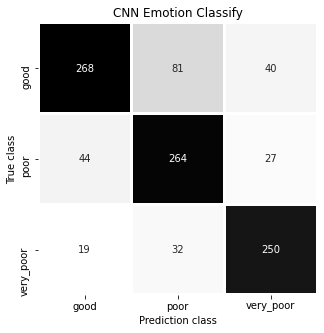

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model(keras_model_path)
tf.saved_model.save(model, saved_model_path)